# Get COT Index

In [1]:
import os, pandas as pd, numpy as np, json
from datetime import datetime, date, time
from dateutil.parser import parse

workPath = "/home/xetra/AlphaGoldmine/Data/"
for f in os.scandir(os.path.join(workPath,"EIA")):
    print(f.path)

/home/xetra/AlphaGoldmine/Data/EIA/IEO.txt
/home/xetra/AlphaGoldmine/Data/EIA/PET.txt
/home/xetra/AlphaGoldmine/Data/EIA/NG.txt
/home/xetra/AlphaGoldmine/Data/EIA/STEO.txt
/home/xetra/AlphaGoldmine/Data/EIA/TOTAL.txt
/home/xetra/AlphaGoldmine/Data/EIA/PET_IMPORTS.txt


In [2]:
idNameDict={}
idUnitsDict={}
daily={}
weekly={}
four={}
monthly={}
anual={}
cat=[]
with open("/home/xetra/AlphaGoldmine/Data/EIA/PET.txt") as f:
    for l in f.readlines():
        tmp=json.loads(l)
        if "series_id" in tmp:
            idNameDict[tmp["series_id"]]=tmp["name"]
            idUnitsDict[tmp["series_id"]]=tmp["units"]
            if tmp["f"]=="D": daily[tmp["series_id"]]=pd.DataFrame(tmp["data"],columns=["date",tmp["series_id"]]).set_index("date")
            if tmp["f"]=="W": 
                if tmp["units"].startswith("Dollars"): continue
                weekly[tmp["series_id"]]=pd.DataFrame(tmp["data"],columns=["date",tmp["series_id"]]).set_index("date")
            if tmp["f"]=="4": four[tmp["series_id"]]=pd.DataFrame(tmp["data"],columns=["date",tmp["series_id"]]).set_index("date")
            # if tmp["f"]=="M": monthly[tmp["series_id"]]=pd.DataFrame(tmp["data"],columns=["date",tmp["series_id"]]).set_index("date")
            # if tmp["f"]=="A": anual[tmp["series_id"]]=pd.DataFrame(tmp["data"],columns=["date",tmp["series_id"]]).set_index("date")
        else: cat.append(tmp)

In [3]:
len(cat) + len(idNameDict)

184960

In [4]:
weekly = pd.concat(weekly.values(),1)

In [5]:
weekly.columns

Index(['PET.WGRSTP21.W', 'PET.WGRSTP31.W', 'PET.WCSIMUS2.W', 'PET.WCSSTUS1.W',
       'PET.WDGRPP12.W', 'PET.WDGRPP22.W', 'PET.WDGRPP32.W', 'PET.WDGRPP42.W',
       'PET.WDGRPP52.W', 'PET.WDGRPUS2.W',
       ...
       'PET.WO3ST_R20_1.W', 'PET.WO3ST_R30_1.W', 'PET.WO3ST_R40_1.W',
       'PET.WO3ST_R50_1.W', 'PET.WO4ST_NUS_1.W', 'PET.WO4ST_R10_1.W',
       'PET.WO4ST_R20_1.W', 'PET.WO4ST_R30_1.W', 'PET.WO4ST_R40_1.W',
       'PET.WO4ST_R50_1.W'],
      dtype='object', length=662)

In [6]:
set(idUnitsDict.values())

{'Barrels per Calendar Day',
 'Barrels per Stream Day',
 'Billion Cubic Feet',
 'Days',
 'Degree',
 'Dollars per Barrel',
 'Dollars per Foot',
 'Dollars per Gallon',
 'Feet per Well',
 'Million Barrels',
 'Million Cubic Feet',
 'Million Cubic Feet per Day',
 'Million Gallons',
 'Million Kilowatthours',
 'Million Pounds',
 'Number of Days',
 'Number of Elements',
 'Percent',
 'Short Tons per Day',
 'Thouand Barrels per Day',
 'Thousand Barrels',
 'Thousand Barrels  per Day',
 'Thousand Barrels per Calendar Day',
 'Thousand Barrels per Day',
 'Thousand Dollars per Well',
 'Thousand Feet',
 'Thousand Gallons',
 'Thousand Gallons per Day',
 'Thousand Short Tons'}

In [7]:
WGRSTP=[l for l in list(weekly) if l.startswith("PET.WGRS")]
weekly[WGRSTP]

,PET.WGRSTP21.W,PET.WGRSTP31.W,PET.WGRSTP11.W,PET.WGRSTP41.W,PET.WGRSTP51.W,PET.WGRSTUS1.W
date,,,,,,
20210108,0.0,0.0,32.0,0.0,20.0,52.0
20210101,0.0,0.0,30.0,0.0,18.0,48.0
20201225,0.0,0.0,26.0,0.0,18.0,44.0
20201218,0.0,0.0,27.0,0.0,15.0,42.0
20201211,0.0,0.0,33.0,0.0,17.0,50.0
...,...,...,...,...,...,...
19821008,NaN,NaN,NaN,NaN,NaN,NaN
19821001,NaN,NaN,NaN,NaN,NaN,NaN
19820924,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
names=[idNameDict[v] for v in WGRSTP]

In [9]:
import re
r=re.compile(r"[a-zA-Z0-9]+")
"".join([w.capitalize() for w in r.findall(names[-1])])

'USEndingStocksOfReformulatedMotorGasolineWeekly'

In [10]:
def prettifyNameEIA(name):
    import re
    r=re.compile(r"[a-zA-Z0-9]+")
    return "".join([re.sub('([a-zA-Z])',lambda x:x.groups()[0].upper(),w,1) for w in r.findall(name)])

In [11]:
USEndingStocksOfReformulatedMotorGasolineWeekly = weekly["PET.WGRSTUS1.W"]

In [12]:
us={k:v for k,v in idNameDict.items() if v.startswith("U.S.")}

In [13]:
us=[i for i in list(weekly) if i in us]

In [14]:
{k:v for k,v in idNameDict.items() if k in us}

{'PET.WCSIMUS2.W': 'U.S. Crude Oil Imports by SPR, Weekly',
 'PET.WCSSTUS1.W': 'U.S. Ending Stocks of Crude Oil in SPR, Weekly',
 'PET.WDGRPUS2.W': 'U.S.  Refiner and Blender Net Production of Distillate Fuel Oil Greater than 500 ppm Sulfur, Weekly',
 'PET.WDGSTUS1.W': 'U.S. Ending Stocks of Distillate Fuel Oil, Greater Than 500 ppm Sulfur, Weekly',
 'PET.WDIEXUS2.W': 'U.S. Exports of Total Distillate, Weekly',
 'PET.WDIIMUS2.W': 'U.S. Imports of Distillate Fuel Oil, Weekly',
 'PET.WDIRPUS2.W': 'U.S. Refiner and Blender Net Production of Distillate Fuel Oil, Weekly',
 'PET.WDISTUS1.W': 'U.S. Ending Stocks of Distillate Fuel Oil, Weekly',
 'PET.WDIUPUS2.W': 'U.S. Product Supplied of Distillate Fuel Oil, Weekly',
 'PET.WGTSTUS1.W': 'U.S. Ending Stocks of Total Gasoline, Weekly',
 'PET.WKCRPUS2.W': 'U.S.  Refiner and Blender Net Production of Commercial Kerosene-Type Jet Fuel, Weekly',
 'PET.WKJEXUS2.W': 'U.S. Exports of Kerosene-Type Jet Fuel, Weekly',
 'PET.WKJIMUS2.W': 'U.S. Imports of

In [15]:
# {k:v for k,v in idNameDict.items() if "distillation capacity".lower() in v.lower()}

In [16]:
weekly = weekly.sort_index(ascending=True)

In [17]:

weekly.index=pd.DatetimeIndex(weekly.index)

<AxesSubplot:title={'center':'USEndingStocksExcludingSPROfCrudeOilAndPetroleumProductsWeekly'}, xlabel='date'>

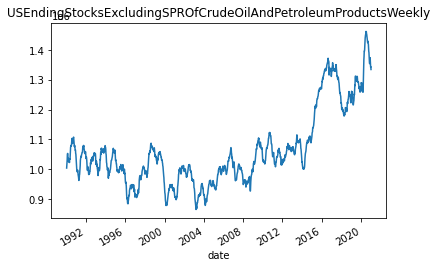

In [18]:
weekly["PET.WTESTUS1.W"].plot(title=f"{prettifyNameEIA(idNameDict['PET.WTESTUS1.W'])}")

True

# WeeklySupplyEstimates

In [133]:
prettifyNameEIA(idNameDict['PET.WCRNTUS2.W'])

'USNetImportsOfCrudeOilWeekly'

## Crude Oil Production

In [20]:
USFieldProductionOfCrudeOilWeekly=weekly["PET.WCRFPUS2.W"]

## Refiner Inputs and Utilization

In [21]:
USRefinerNetInputOfCrudeOilWeekly=weekly["PET.WCRRIUS2.W"]

In [22]:
USGrossInputsIntoRefineriesWeekly=weekly["PET.WGIRIUS2.W"]

In [23]:
USOperableCrudeOilDistillationCapacityWeekly=weekly["PET.WOCLEUS2.W"]

In [24]:
USPercentUtilizationOfRefineryOperableCapacityWeekly=weekly["PET.WPULEUS3.W"]

##	Refiner and Blender Net Inputs

In [25]:
USRefinerAndBlenderNetInputOfGasolineBlendingComponentsWeekly=weekly["PET.WBCRI_NUS_2.W"]

In [26]:
USRefinerAndBlenderNetInputOfFuelEthanolWeekly=weekly["PET.W_EPOOXE_YIR_NUS_MBBLD.W"]

## Refiner and Blender Net Production


In [27]:
USRefinerAndBlenderAdjustedNetProductionOfFinishedMotorGasolineWeekly=weekly["PET.WGFRPUS2.W"]

In [28]:
USRefinerAndBlenderNetProductionOfKeroseneTypeJetFuelWeekly=weekly["PET.WKJRPUS2.W"]

In [29]:
USRefinerAndBlenderNetProductionOfDistillateFuelOilWeekly=weekly["PET.WDIRPUS2.W"]

In [30]:
USRefinerAndBlenderNetProductionOfResidualFuelOilWeekly=weekly["PET.WRERPUS2.W"]

In [31]:
USRefinerBlenderAndGasPlantNetProductionOfPropaneAndPropyleneWeekly=weekly["PET.WPRTP_NUS_2.W"]

## Ethanol Plant Production

In [32]:
USOxygenatePlantProductionOfFuelEthanolWeekly=weekly["PET.W_EPOOXE_YOP_NUS_MBBLD.W"]

## Stocks

In [33]:
USEndingStocksOfCrudeOilAndPetroleumProductsWeekly=weekly["PET.WTTSTUS1.W"]

In [34]:
USEndingStocksExcludingSPROfCrudeOilAndPetroleumProductsWeekly=weekly["PET.WTESTUS1.W"]

In [35]:
USEndingStocksOfCrudeOilWeekly=weekly["PET.WCRSTUS1.W"]

In [36]:
USEndingStocksOfTotalGasolineWeekly=weekly["PET.WGTSTUS1.W"]

In [37]:
USEndingStocksOfFuelEthanolWeekly=weekly["PET.W_EPOOXE_SAE_NUS_MBBL.W"]

In [38]:
USEndingStocksOfKeroseneTypeJetFuelWeekly=weekly["PET.WKJSTUS1.W"]

In [39]:
USEndingStocksOfDistillateFuelOilWeekly=weekly["PET.WDISTUS1.W"]

In [40]:
USEndingStocksOfResidualFuelOilWeekly=weekly["PET.WRESTUS1.W"]

In [41]:
USPropaneAndPropyleneEndingStocksExcludingPropyleneAtTerminalWeekly=weekly["PET.WPRSTUS1.W"]

In [42]:
USEndingStocksOfOtherOilsExcludingFuelEthanolWeekly=["PET.W_EPPO6_SAE_NUS_MBBL.W"]

## Days of Supply (Number of Days)

In [116]:
USDaysOfSupplyOfCrudeOilExcludingSPRWeekly=weekly["PET.W_EPC0_VSD_NUS_DAYS.W"]
USDaysOfSupplyOfTotalGasolineWeekly=weekly["PET.W_EPM0_VSD_NUS_DAYS.W"]
USDaysOfSupplyOfKeroseneTypeJetFuelWeekly=weekly["PET.W_EPJK_VSD_NUS_DAYS.W"]
USDaysOfSupplyOfPropanePropyleneWeekly=weekly["PET.W_EPLLPZ_VSD_NUS_DAYS.W"]
USDaysOfSupplyOfTotalDistillateWeekly=weekly["PET.W_EPD0_VSD_NUS_DAYS.W"]

## Imports

In [44]:
USImportsOfCrudeOilAndPetroleumProductsWeekly=weekly["PET.WTTIMUS2.W"]
USImportsOfCrudeOilWeekly=weekly["PET.WCRIMUS2.W"]

In [45]:
### Total PRODUCTS contains 4 sub parts 
USImportsOfTotalPetroleumProductsWeekly=weekly["PET.WRPIMUS2.W"]
#1.Total Motor Gasoline
USImportsOfTotalGasolineWeekly=weekly["PET.WGTIMUS2.W"]
#1.a Kerosene-Type Jet Fuel
USImportsOfKeroseneTypeJetFuelWeekly=weekly["PET.WKJIMUS2.W"]
#2. Distillate Fuel Oil
USImportsOfDistillateFuelOilWeekly=weekly["PET.WDIIMUS2.W"]
#3. Residual Fuel Oil
USImportsOfResidualFuelOilWeekly=weekly["PET.WREIMUS2.W"]
#4. Propane/Propylene
USImportsOfPropaneAndPropyleneWeekly=weekly["PET.WPRIM_NUS-Z00_2.W"]
#5.Other Oils
USImportsOfOtherOilsExcludingFuelEthanolWeekly=weekly["PET.W_EPPO6_IM0_NUS-Z00_MBBLD.W"]

## Exports

In [46]:
USExportsOfTotalPetroleumProductsWeekly=weekly["PET.WRPEXUS2.W"]
USExportsOfCrudeOilWeekly=weekly["PET.WCREXUS2.W"]
USExportsOfCrudeOilAndPetroleumProductsWeekly=weekly["PET.WTTEXUS2.W"]
USExportsOfFinishedMotorGasolineWeekly=weekly["PET.W_EPM0F_EEX_NUS-Z00_MBBLD.W"]
USExportsOfKeroseneTypeJetFuelWeekly=weekly["PET.WKJEXUS2.W"]
USExportsOfTotalDistillateWeekly=weekly["PET.WDIEXUS2.W"]
USExportsOfResidualFuelOilWeekly=weekly["PET.WREEXUS2.W"]
USExportsOfPropaneAndPropyleneWeekly=weekly["PET.W_EPLLPZ_EEX_NUS-Z00_MBBLD.W"]
USExportsOfOtherOilsWeekly=weekly["PET.W_EPPO4_EEX_NUS-Z00_MBBLD.W"]

## Net Imports (Including SPR)

In [134]:
### Need to calculate total
USNetImportsOfTotalPetroleumProductsWeekly=weekly["PET.WRPNTUS2.W"]
USNetImportsOfCrudeOilWeekly=weekly['PET.WCRNTUS2.W']
USNetImportsOfCrudeOilAndPetroleumProductsWeekly=weekly['PET.WTTNTUS2.W']

## Product Supplied

In [48]:
#Total
USProductSuppliedOfPetroleumProductsWeekly=weekly["PET.WRPUPUS2.W"]

USProductSuppliedOfFinishedMotorGasolineWeekly=weekly["PET.WGFUPUS2.W"]
USProductSuppliedOfKeroseneTypeJetFuelWeekly=weekly["PET.WKJUPUS2.W"]
USProductSuppliedOfDistillateFuelOilWeekly=weekly["PET.WDIUPUS2.W"]
USProductSuppliedOfResidualFuelOilWeekly=weekly["PET.WREUPUS2.W"]
USProductSuppliedOfPropaneAndPropyleneWeekly=weekly["PET.WPRUP_NUS_2.W"]
USProductSuppliedOfOtherOilsWeekly=weekly["PET.WWOUP_NUS_2.W"]

In [135]:
l = [
"PET.WCRFPUS2.W",
"PET.WCRRIUS2.W",
"PET.WGIRIUS2.W",
"PET.WOCLEUS2.W",
"PET.WPULEUS3.W",
"PET.WBCRI_NUS_2.W",
"PET.W_EPOOXE_YIR_NUS_MBBLD.W",
"PET.WGFRPUS2.W",
"PET.WKJRPUS2.W",
"PET.WDIRPUS2.W",
"PET.WRERPUS2.W",
"PET.WPRTP_NUS_2.W",
"PET.W_EPOOXE_YOP_NUS_MBBLD.W",
"PET.WTTSTUS1.W",
"PET.WTESTUS1.W",
"PET.WCRSTUS1.W",
"PET.WGTSTUS1.W",
"PET.W_EPOOXE_SAE_NUS_MBBL.W",
"PET.WKJSTUS1.W",
"PET.WDISTUS1.W",
"PET.WRESTUS1.W",
"PET.WPRSTUS1.W",
"PET.W_EPPO6_SAE_NUS_MBBL.W",
"PET.W_EPJK_VSD_NUS_DAYS.W",
"PET.W_EPM0_VSD_NUS_DAYS.W",
"PET.W_EPLLPZ_VSD_NUS_DAYS.W",
"PET.W_EPC0_VSD_NUS_DAYS.W",
"PET.W_EPD0_VSD_NUS_DAYS.W",
"PET.WTTIMUS2.W",
"PET.WCRIMUS2.W",
"PET.WRPIMUS2.W",
"PET.WGTIMUS2.W",
"PET.WKJIMUS2.W",
"PET.WDIIMUS2.W",
"PET.WREIMUS2.W",
"PET.WPRIM_NUS-Z00_2.W",
"PET.W_EPPO6_IM0_NUS-Z00_MBBLD.W",
"PET.WRPEXUS2.W",
"PET.WCREXUS2.W",
"PET.WTTEXUS2.W",
"PET.W_EPM0F_EEX_NUS-Z00_MBBLD.W",
"PET.WKJEXUS2.W",
"PET.WDIEXUS2.W",
"PET.WREEXUS2.W",
"PET.W_EPLLPZ_EEX_NUS-Z00_MBBLD.W",
"PET.W_EPPO4_EEX_NUS-Z00_MBBLD.W",
"PET.WRPNTUS2.W",
"PET.WCRNTUS2.W",
"PET.WTTNTUS2.W",
"PET.WRPUPUS2.W",
"PET.WGFUPUS2.W",
"PET.WKJUPUS2.W",
"PET.WDIUPUS2.W",
"PET.WREUPUS2.W",
"PET.WPRUP_NUS_2.W",
"PET.WWOUP_NUS_2.W",
]

In [136]:
out=weekly[l].reset_index()

In [137]:
out

,date,PET.WCRFPUS2.W,PET.WCRRIUS2.W,PET.WGIRIUS2.W,PET.WOCLEUS2.W,PET.WPULEUS3.W,PET.WBCRI_NUS_2.W,PET.W_EPOOXE_YIR_NUS_MBBLD.W,PET.WGFRPUS2.W,PET.WKJRPUS2.W,...,PET.WRPNTUS2.W,PET.WCRNTUS2.W,PET.WTTNTUS2.W,PET.WRPUPUS2.W,PET.WGFUPUS2.W,PET.WKJUPUS2.W,PET.WDIUPUS2.W,PET.WREUPUS2.W,PET.WPRUP_NUS_2.W,PET.WWOUP_NUS_2.W
0,1982-08-20,NaN,11722,NaN,NaN,NaN,NaN,NaN,6217,753,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1982-08-27,NaN,11918,NaN,NaN,NaN,NaN,NaN,6262,815,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1982-09-24,NaN,12375,NaN,NaN,NaN,NaN,NaN,6503,749,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1982-10-01,NaN,12303,NaN,NaN,NaN,NaN,NaN,6492,760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1982-10-08,NaN,12062,NaN,NaN,NaN,NaN,NaN,6280,765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,2020-12-11,11000.0,14183,14544.0,18386.0,79.1,552.0,802.0,8522,1104,...,-2695.0,2797.0,102.0,19335.0,7975.0,1149.0,4002.0,289.0,1671.0,4249.0
1994,2020-12-18,11000.0,14014,14347.0,18386.0,78.0,607.0,802.0,8829,1143,...,-3781.0,2465.0,-1316.0,19088.0,8022.0,1196.0,4174.0,128.0,1292.0,4278.0
1995,2020-12-25,11000.0,14287,14591.0,18386.0,79.4,746.0,818.0,9191,1199,...,-3623.0,1701.0,-1921.0,19317.0,8128.0,1217.0,3594.0,275.0,1755.0,4348.0
1996,2021-01-01,11000.0,14376,14834.0,18386.0,80.7,-467.0,719.0,8010,1147,...,-3334.0,1737.0,-1597.0,17054.0,7441.0,917.0,2941.0,197.0,1702.0,3857.0


In [147]:
# import pandas_market_calendars
workPath = "/home/xetra/AlphaGoldmine/Data/"
calPath = os.path.join(workPath, "Calendar/Calendar")
cal = pd.read_feather(calPath)

In [139]:
inv = cal[cal["name"] == ("Crude Oil Inventories")]

In [140]:
inv

,eventId,datetime,country,importance,name,actual,forecast,previous
39,6347,2010-01-06 10:30:00,United States,3,Crude Oil Inventories,1.300M,,-1.500M
117,6409,2010-01-13 10:30:00,United States,3,Crude Oil Inventories,3.700M,1.300M,1.300M
216,6501,2010-01-21 11:00:00,United States,3,Crude Oil Inventories,-0.400M,,3.700M
268,6539,2010-01-27 10:30:00,United States,3,Crude Oil Inventories,-3.900M,,-0.400M
552,6626,2010-02-03 10:30:00,United States,3,Crude Oil Inventories,2.300M,,-3.900M
...,...,...,...,...,...,...,...,...
159420,421463,2021-01-06 10:30:00,United States,3,Crude Oil Inventories,-8.010M,-2.133M,-6.065M
159790,421985,2021-01-13 10:30:00,United States,3,Crude Oil Inventories,-3.247M,-2.266M,-8.010M
160311,422541,2021-01-22 11:00:00,United States,3,Crude Oil Inventories,4.351M,-1.167M,-3.247M
160488,422897,2021-01-27 10:30:00,United States,3,Crude Oil Inventories,-9.910M,0.430M,4.351M


In [141]:
out=out[out.date.dt.year>=2010]

In [142]:
for _,d in out.date.iteritems():
    dt=inv.loc[inv.datetime.dt.date>d,"datetime"].min()
    out.loc[out.date.dt.date==d,"release"] = dt

/home/xetra/miniconda3/envs/ml/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/home/xetra/miniconda3/envs/ml/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [143]:
out.loc[out.release.duplicated(),["date","release"]]

,date,release
1457,2010-09-03,2010-09-09 10:00:00
1470,2010-12-03,2010-12-08 10:30:00
1531,2012-02-03,2012-02-08 10:30:00
1557,2012-08-03,2012-08-08 09:30:00
1570,2012-11-02,2012-11-07 10:30:00
1596,2013-05-03,2013-05-08 09:30:00
1620,2013-10-18,2013-10-21 09:30:00


In [144]:
out.loc[out.release == parse("2010-09-09 10:00:00"),["date","release"]]

,date,release
1456,2010-08-27,2010-09-09 10:00:00
1457,2010-09-03,2010-09-09 10:00:00


In [145]:
out.reset_index(drop=True).to_feather("inventories")

In [146]:
out

,date,PET.WCRFPUS2.W,PET.WCRRIUS2.W,PET.WGIRIUS2.W,PET.WOCLEUS2.W,PET.WPULEUS3.W,PET.WBCRI_NUS_2.W,PET.W_EPOOXE_YIR_NUS_MBBLD.W,PET.WGFRPUS2.W,PET.WKJRPUS2.W,...,PET.WCRNTUS2.W,PET.WTTNTUS2.W,PET.WRPUPUS2.W,PET.WGFUPUS2.W,PET.WKJUPUS2.W,PET.WDIUPUS2.W,PET.WREUPUS2.W,PET.WPRUP_NUS_2.W,PET.WWOUP_NUS_2.W,release
1422,2010-01-01,5507.0,13792,14120.0,17681.0,79.9,545.0,NaN,9071,1448,...,8323.0,9007.0,18755.0,8741.0,1540.0,3546.0,498.0,1605.0,2826.0,2010-01-06 10:30:00
1423,2010-01-08,5496.0,14005,14374.0,17681.0,81.3,236.0,NaN,8511,1426,...,8863.0,9676.0,18637.0,8740.0,1344.0,3614.0,459.0,1606.0,2875.0,2010-01-13 10:30:00
1424,2010-01-15,5404.0,13824,13859.0,17681.0,78.4,390.0,NaN,8565,1374,...,8507.0,9475.0,18736.0,8602.0,1236.0,3823.0,404.0,1794.0,2876.0,2010-01-21 11:00:00
1425,2010-01-22,5421.0,13624,13871.0,17681.0,78.5,602.0,NaN,8636,1343,...,7834.0,9059.0,18884.0,8619.0,1430.0,3725.0,597.0,1677.0,2836.0,2010-01-27 10:30:00
1426,2010-01-29,5403.0,13461,13738.0,17681.0,77.7,485.0,NaN,8584,1309,...,8393.0,9693.0,18742.0,8613.0,1430.0,3659.0,385.0,1460.0,3195.0,2010-02-03 10:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,2020-12-11,11000.0,14183,14544.0,18386.0,79.1,552.0,802.0,8522,1104,...,2797.0,102.0,19335.0,7975.0,1149.0,4002.0,289.0,1671.0,4249.0,2020-12-16 10:30:00
1994,2020-12-18,11000.0,14014,14347.0,18386.0,78.0,607.0,802.0,8829,1143,...,2465.0,-1316.0,19088.0,8022.0,1196.0,4174.0,128.0,1292.0,4278.0,2020-12-23 10:30:00
1995,2020-12-25,11000.0,14287,14591.0,18386.0,79.4,746.0,818.0,9191,1199,...,1701.0,-1921.0,19317.0,8128.0,1217.0,3594.0,275.0,1755.0,4348.0,2020-12-30 10:30:00
1996,2021-01-01,11000.0,14376,14834.0,18386.0,80.7,-467.0,719.0,8010,1147,...,1737.0,-1597.0,17054.0,7441.0,917.0,2941.0,197.0,1702.0,3857.0,2021-01-06 10:30:00


In [220]:
import matplotlib.pyplot as plt

In [221]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

In [153]:
out=out.set_index("release").drop("date",1)

In [176]:
out=out[~out.index.duplicated(keep="last")]

In [178]:
from mlfinlab.data_structures import *

In [179]:
def eventSampling(df,tEvents,how={}):
    out = pd.DataFrame(columns=df.columns)
    base = df.index[0]
    for d in tEvents:
        pass

In [183]:
contFuture = os.path.join(workPath, "cl", "CLCont")

In [203]:
df = pd.read_feather(contFuture).set_index("date")

In [204]:
base = df.index[0]
to = out.index[0]

In [191]:
def resampleOHLCV(df,interval,how={"o":"first","h":"max","l":"min","c":"last"}):
    """Need to forwardfill new created columns in a concatenaed big df"""
    shift = timedelta(hours=1)
    i = int(re.match(r'\d+', interval).group())#
    if interval.endswith("H"): shift = timedelta(hours=i)
    elif interval.endswith("D"): shift = timedelta(days=i)
    elif interval.endswith("min"): shift = timedelta(minutes=i)
    return df.resample(interval).agg(how).add_suffix(interval).shift(i, freq=shift)

In [215]:
out["rPrices"]=df.loc[df.index.intersection(out.index),"rPrices"]

<ipython-input-215-d4f261eb1eb8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out["rPrices"]=df.loc[df.index.intersection(out.index),"rPrices"]


In [219]:
out=out.dropna(subset=["rPrices"])

In [240]:
span=100

In [241]:
from ResearchML import *

In [242]:
trgt = getDailyVol(df["c"],span0=span)
t1 = getT1(df["c"],out.index,span=pd.Timedelta(days=5))
events=getEvents(close=df["c"],tEvents=out.index,ptSl=[5],trgt=trgt,
minRet=trgt.quantile(0.1),
numThreads=10,t1=t1)
bins = getBins(events=events,close=df["c"])

2021-03-19 13:28:49.165543 100.0% applyPtSlOnT1 done after 0.04 minutes. Remaining 0.0 minutes.


In [243]:
bins.bin.value_counts()

-1.0    295
 1.0    263
Name: bin, dtype: int64

In [239]:
bins

,ret,bin
2010-01-13 10:30:00,0.001160,1.0
2010-01-21 11:00:00,-0.023005,-1.0
2010-02-03 10:30:00,-0.017034,-1.0
2010-02-12 11:00:00,0.033293,1.0
2010-02-18 11:00:00,0.004514,1.0
...,...,...
2020-10-07 09:30:00,0.006774,1.0
2020-10-15 10:00:00,0.027882,1.0
2020-10-21 09:30:00,-0.040821,-1.0
2020-10-28 09:30:00,-0.086341,-1.0


In [262]:
from mlfinlab.microstructural_features import *
from mlfinlab.sample_weights import *
w = get_weights_by_return(events.dropna(),df["c"],12)

2021-03-19 13:38:23.950540 100.0% num_concurrent_events done after 0.03 minutes. Remaining 0.0 minutes.
2021-03-19 13:38:34.885680 100.0% _apply_weight_by_return done after 0.13 minutes. Remaining 0.0 minutes.


In [252]:
idx = out.loc[out.index.year < 2019].index

In [263]:
X = out.loc[idx].mul(w.loc[idx],0)
y = bins.loc[idx,"bin"]

In [264]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, log_loss

In [328]:
clf2 = RandomForestClassifier(n_estimators=1,criterion="entropy",bootstrap=False,class_weight="balanced_subsample")
clf2 = BaggingClassifier(base_estimator=clf2,n_estimators=1000,max_samples=0.5,max_features=1.,oob_score=True,n_jobs=-1)

In [317]:
# clf2 = RandomForestClassifier(n_estimators=50,criterion="entropy",class_weight="balanced_subsample", max_features=int(1), oob_score=True)

In [329]:
clf2.fit(X,y)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=False,
                                                        class_weight='balanced_subsample',
                                                        criterion='entropy',
                                                        n_estimators=1),
                  max_samples=0.5, n_estimators=1000, n_jobs=-1,
                  oob_score=True)

In [330]:
from mlfinlab.cross_validation import *
cv_gen = PurgedKFold(n_splits=5, samples_info_sets=events.loc[idx,"t1"], pct_embargo=0.1)
oos = ml_cross_val_score(clf2,X.loc[idx],y.loc[idx],cv_gen,sample_weight_train=w.loc[idx],
scoring=log_loss)

In [331]:
from mlfinlab.feature_importance import *

In [332]:
cols=[]
for f in X.columns:
    try:cols.append(prettifyNameEIA(idNameDict[f]))
    except:cols.append(f)

X.columns = cols

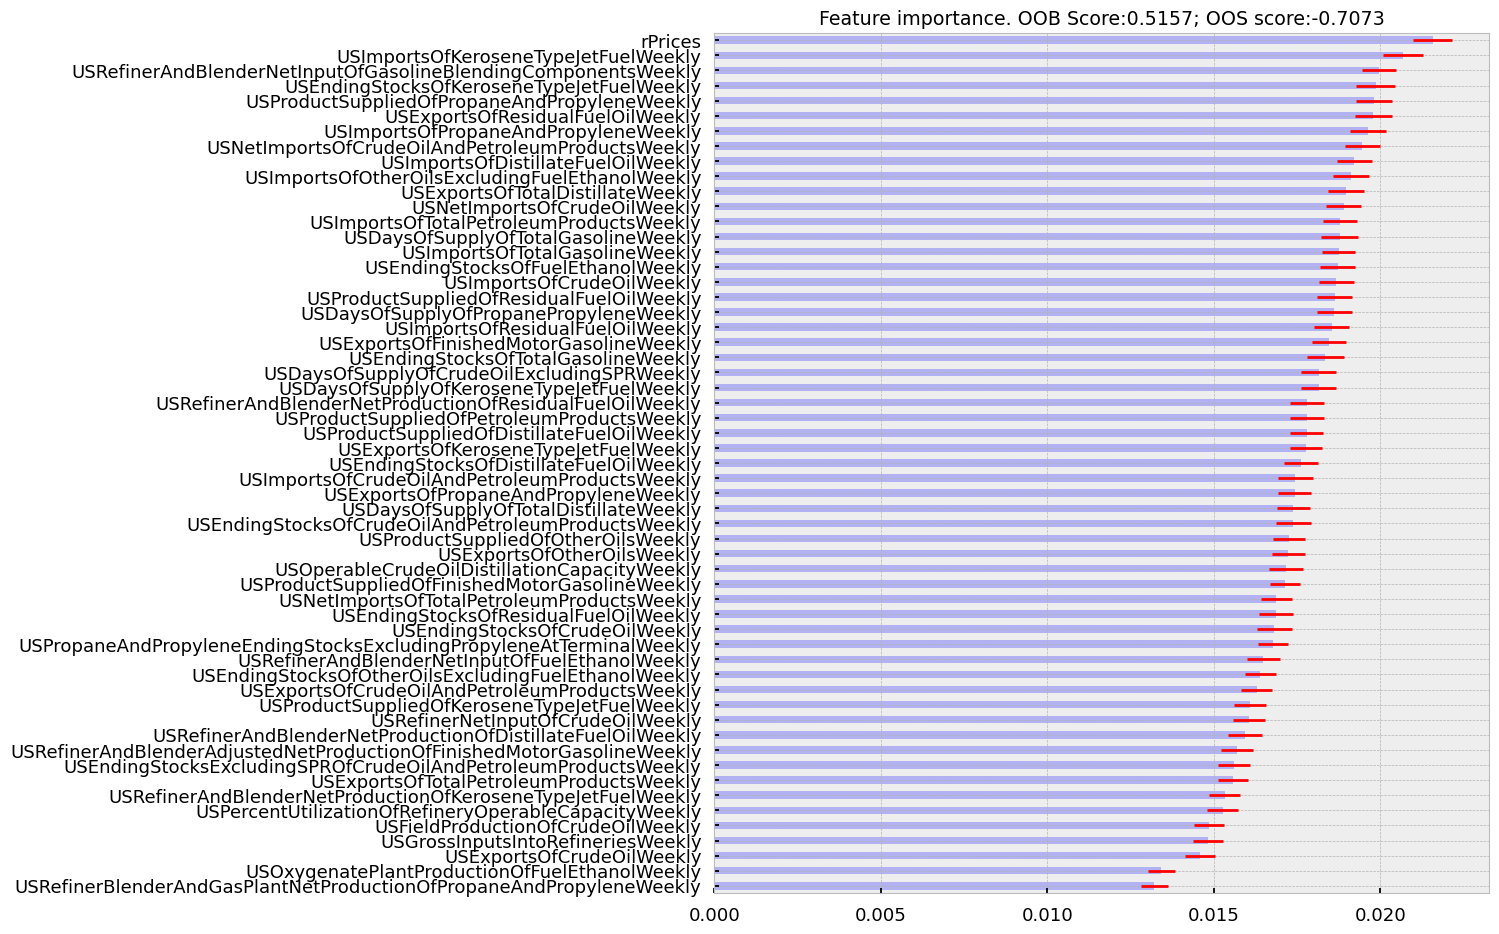

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=False,
                                                        class_weight='balanced_subsample',
                                                        criterion='entropy',
                                                        n_estimators=1),
                  max_samples=0.5, n_estimators=1000, n_jobs=-1,
                  oob_score=True)

In [333]:
mdi=mean_decrease_impurity(clf2,X.columns)
plot_feature_importance(mdi,
oob_score=clf2.oob_score_,
oos_score=oos.mean(),
)
clf2

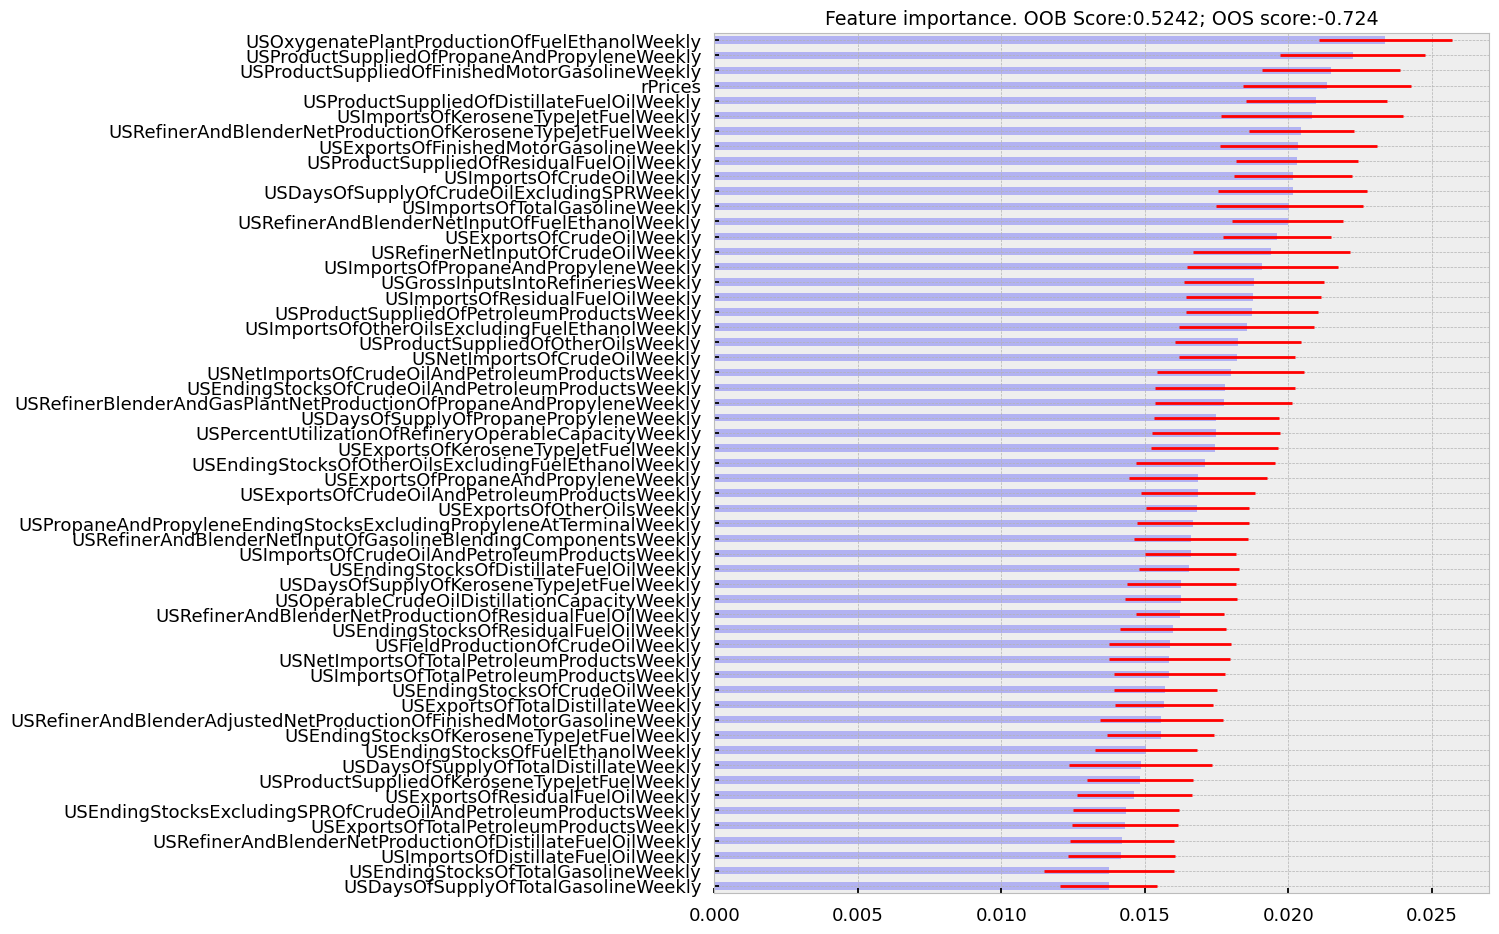

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_features=1, n_estimators=50, oob_score=True)

In [327]:
mdi=mean_decrease_impurity(clf2,X.columns)
plot_feature_importance(mdi,
oob_score=clf2.oob_score_,
oos_score=oos.mean(),
)
clf2

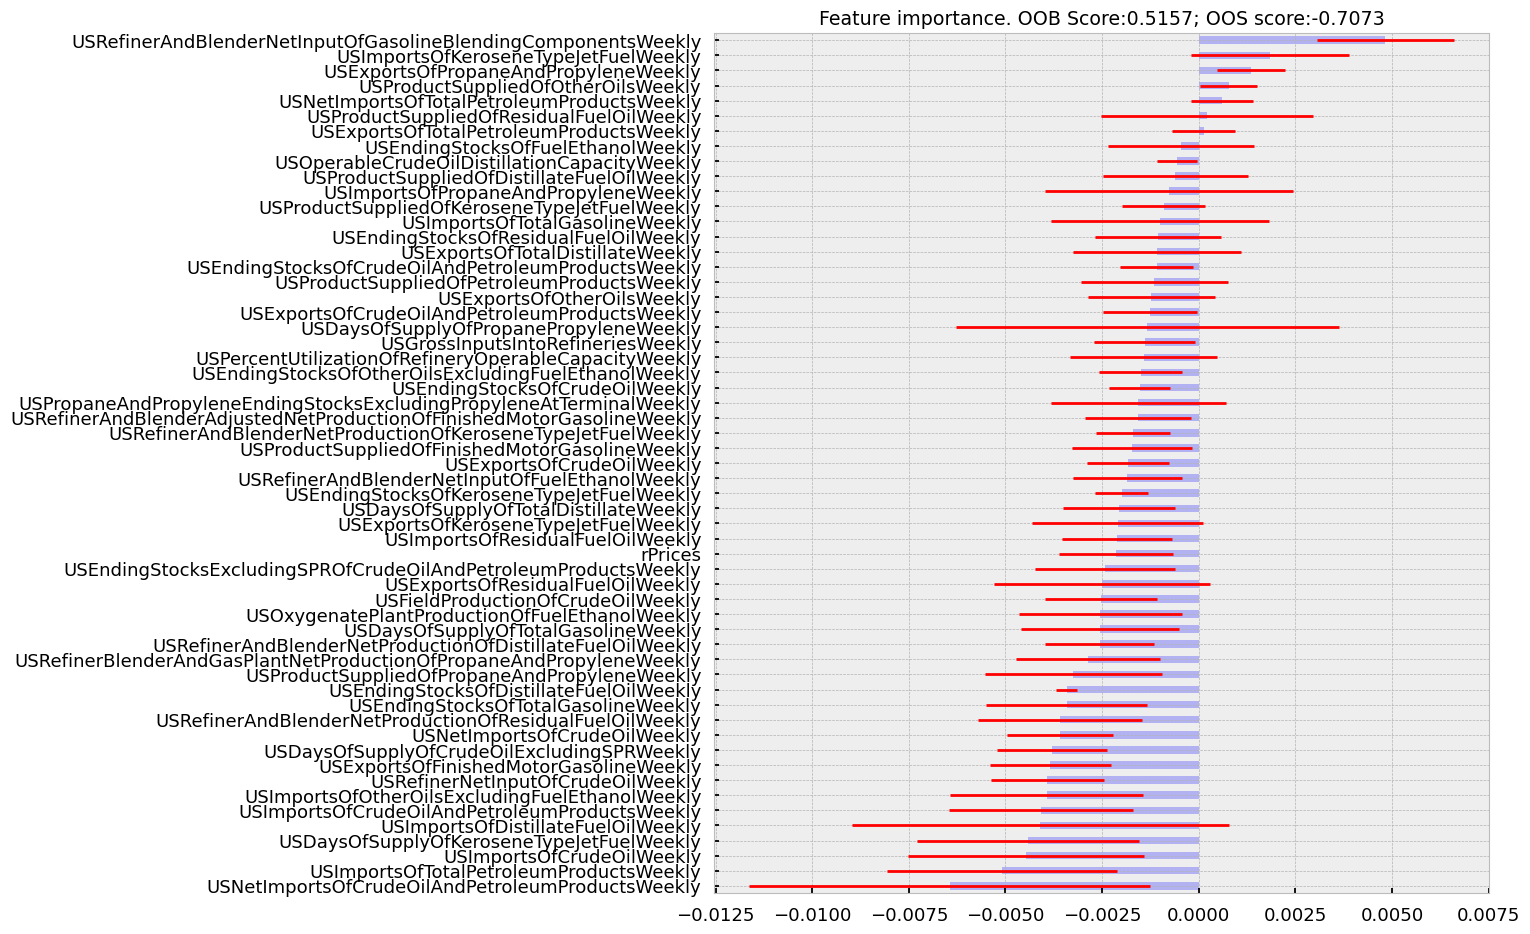

In [334]:
mda=mean_decrease_accuracy(clf2,X.loc[idx],y.loc[idx],cv_gen,sample_weight_train=w.loc[idx],scoring=log_loss)
plot_feature_importance(mda,
oob_score=clf2.oob_score_,
oos_score=oos.mean(),
)

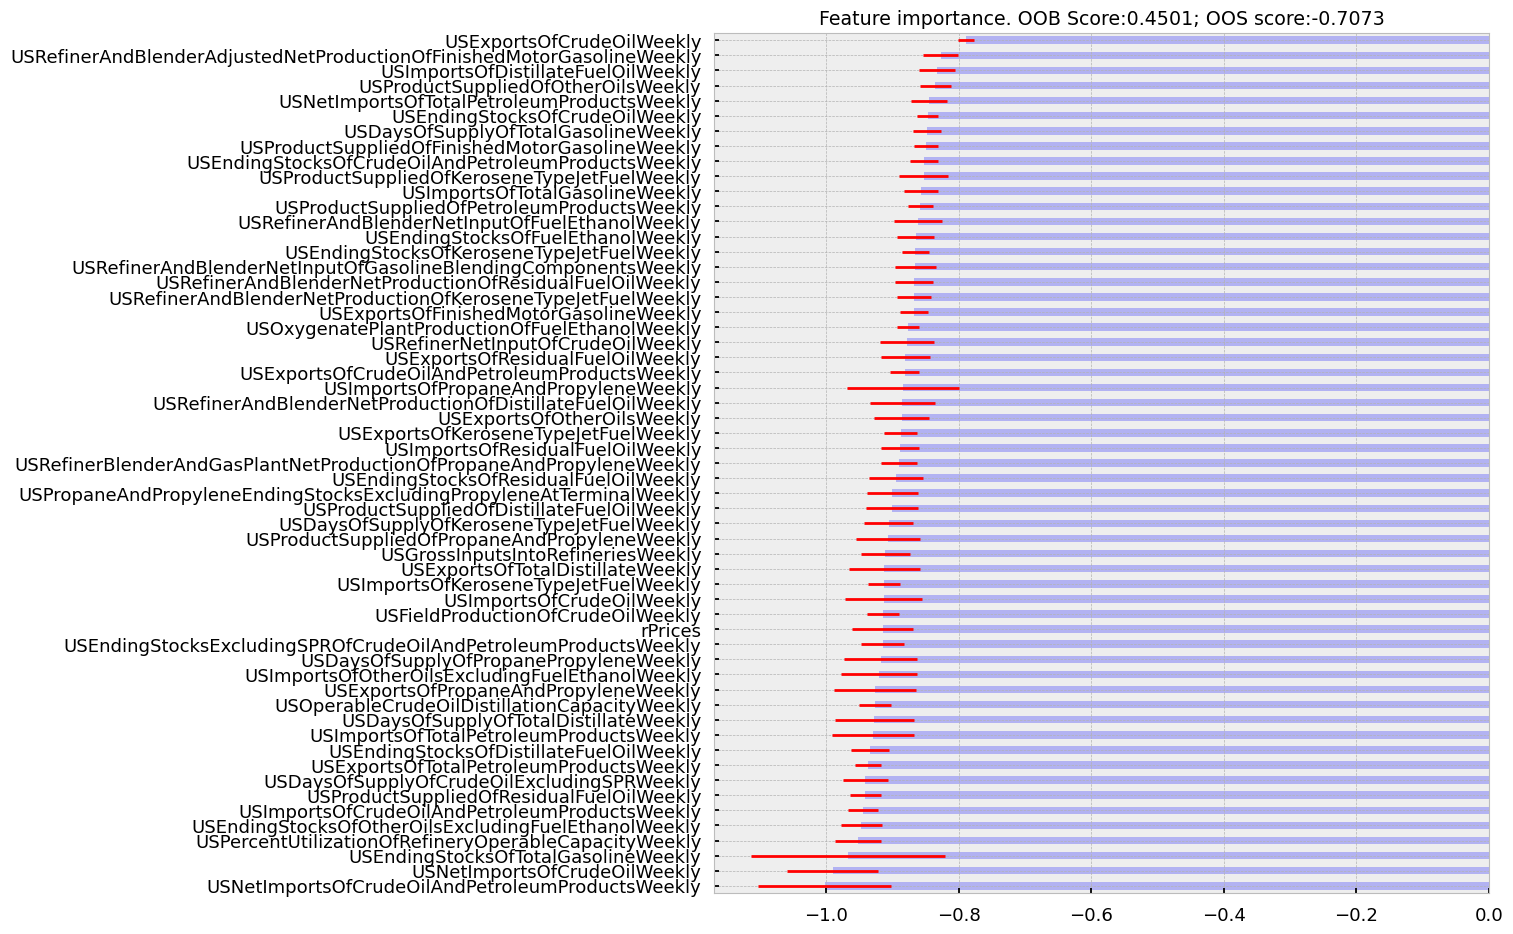

In [335]:
sfi = single_feature_importance(clf2,X.loc[idx],y.loc[idx],cv_gen,sample_weight_train=w.loc[idx],scoring=log_loss)
plot_feature_importance(sfi,
oob_score=clf2.oob_score_,
oos_score=oos.mean(),
)